# Objective 
Statistical Analysis of Business Data. Explore the dataset and extract insights from the data. 

### Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, the attributes of customers like the ones mentioned below can be crucial in making business decisions. 
##### We can assume that the dataset is a simple random sample from the greater population.


Do the following:

* Explore the dataset and extract insights using Exploratory Data Analysis.
* Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? [Hint- Formulate a hypothesis and prove/disprove it]
* Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
* Is the proportion of smokers significantly different across different regions? [Hint : Create a contingency table/cross tab, Use the function : stats.chi2_contingency()]
* Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.
### Consider a significance level of 0.05 for all tests.

## Data Dictionary –

* Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
* Sex - This is the policy holder's gender, either male or female.
* BMI - This is the body mass index (BMI), which provides a sense of how over or underweight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
* Children - This is an integer indicating the number of children/dependents covered by the insurance plan.
* Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
* Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
* Charges​ - Individual medical costs billed to health insurance


# Import Packages

In [2]:
import warnings
warnings.filterwarnings('ignore') #ignore warnings on future library updates that might cause problems with the code
#Import key libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#enable plotting in Jupyter notebook
%matplotlib inline
import scipy.stats as stats
#import the relevant statistical packages for analysis
from scipy.stats import binom
from scipy.stats import norm 
from scipy.stats import t

# Import Data

In [3]:
bs=pd.read_csv('AxisInsurance.csv') #read in Axis INsurance Dataset
df=bs.copy() #create copy of dataset for manipulation

In [4]:
df.head(10) #inspect the first 10 rows of the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.tail(10) #inspect the last 10 rows of the data

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [6]:
df.shape #inspect the shape of the dataset

(1338, 7)

* Dataset has 1338 rows and 9 columns

## Check data types for dataset

In [7]:
df.info() #dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* Variables age and children are discrete numerical values, so the int64 is a valid data type.
* Variables bmi and charges are continuous numerical variables, so the float64 is a valid data type.
* Sex, smoker, and region are of object type, and should be changed to categories.
* Converting objects to category reduces space required to store the dataframe.

In [8]:
#changing dataset object types to categories
df["sex"]=df["sex"].astype("category")
df["smoker"]=df["smoker"].astype("category")
df["region"]=df["region"].astype("category")

In [9]:
df.info() #checking new dataset data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


* Sex, smoker, and region have been changed to categories.

## Statistical summary for the dataset

In [63]:
df.describe() #further inspect the data getting the iqr info

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* Mean is greater than the median for age, children, and charges suggesting these variables are right skewed.
* Mean and Median of BMI is approximately the same.

In [11]:
df.describe(include=["category"]) #further inspect the categorical data

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [12]:
df.value_counts('region')

region
southeast    364
southwest    325
northwest    325
northeast    324
dtype: int64

* The sample group has more males (676) than females (662)
* The sample group has more non-smokers (1064) than smokers (274)
* Region has 4 values (Southeast, Southwest, Northwest, Northwest), southeast has the most clients in the sample (364)

In [13]:
df.isnull().sum() #check dataset for null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There are no missing values in the dataset

# EDA
# Univariate Analysis

In [14]:
def histobox(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

## Observations on Age

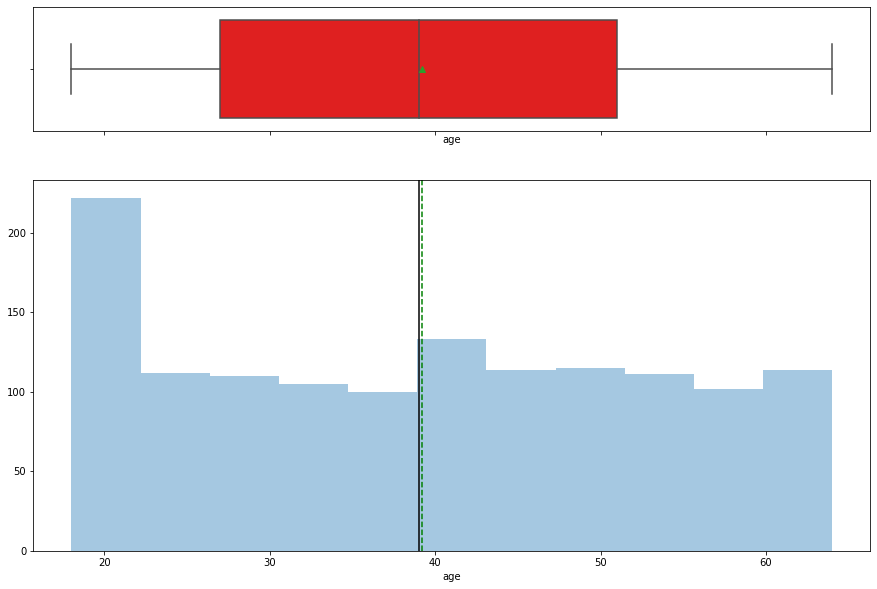

In [15]:
histobox(df['age'])

* The distribution of age is right skewed.
* There are no outliers in this variable.
* The third quartile is equal to 51, which means 75% of the customers in this group are below the age of 51.
* Over 200 customers in this group are 18-22.

## Observations on BMI

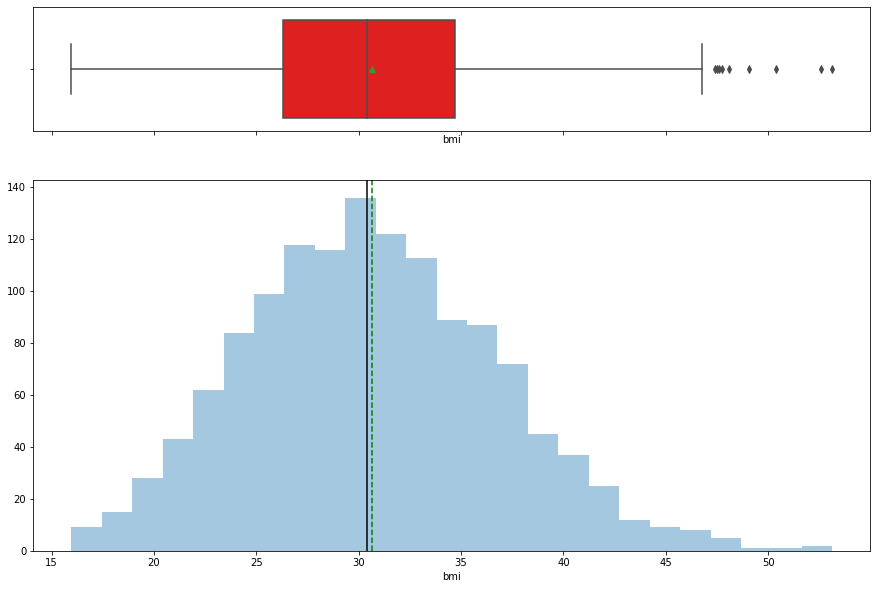

In [16]:
histobox(df['bmi'])

* Mean and Median of BMI are approximately the same.
* There are outliers present in the data (customers with BMI greater than 46).
* An ideal BMI is within the range of 18.5 to 24.9. The mean and median are slightly over the upper end of that range indicating almost half of the group falls in the overweight category.

## Observations on Charges

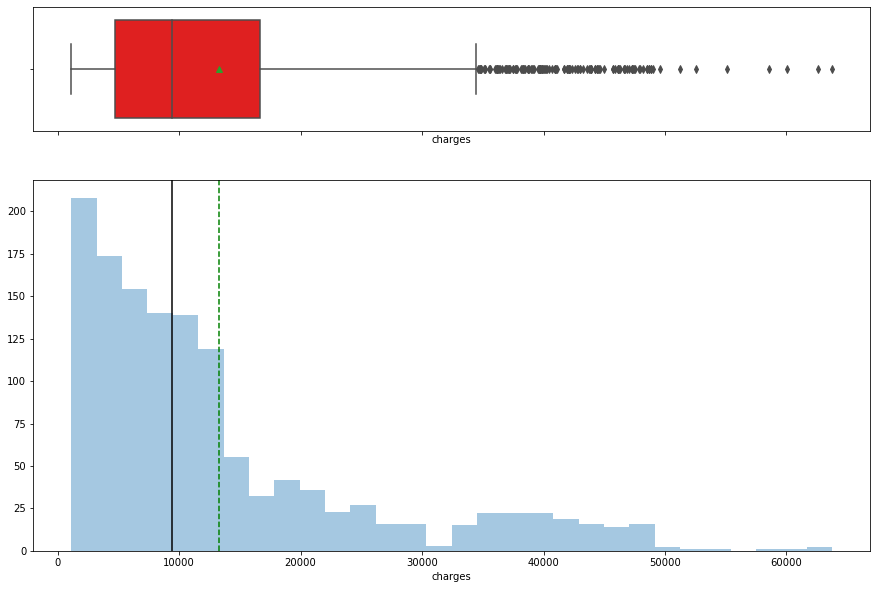

In [17]:
histobox(df['charges'])

* Charges are right skewed.
* There are many outliers toward the higher end.
* Mean charges of customers is around 13000.

## Observations on Children

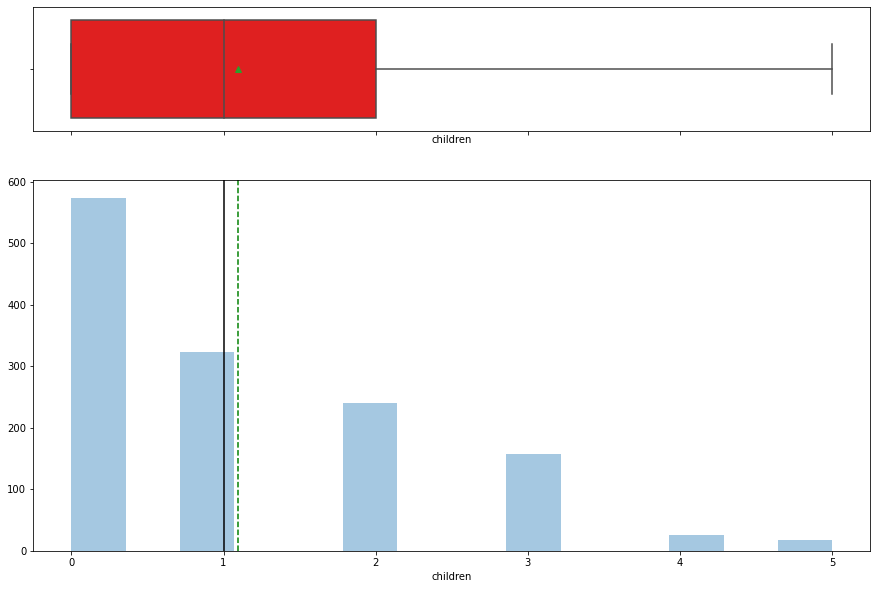

In [18]:
histobox(df['children'])

* There are no outliers for children covered by the insurance plan in this dataset.
* On average plans cover 1 child, but no children are the majority. This makes sense given the large amount of customers of a younger age.

In [19]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

## Observations on Sex

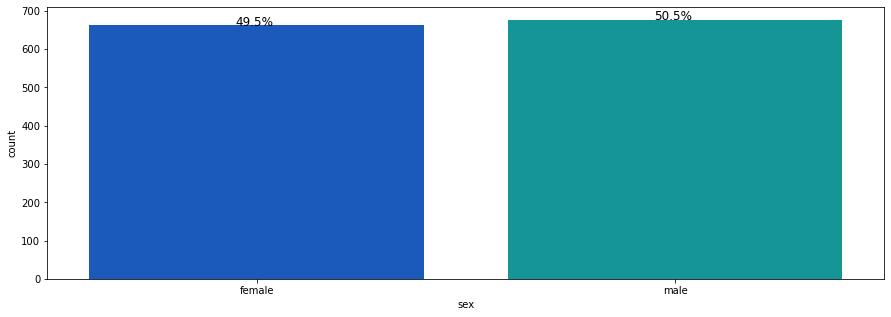

In [20]:
#EDA on categorical variables
plt.figure(figsize=(15,5))
ax = sns.countplot(df["sex"],palette='winter')
bar_perc(ax,df["sex"])

* There are slightly more men(50.5%) than women(49.5%) in the dataset, but not by much.

## Observations on Smokers

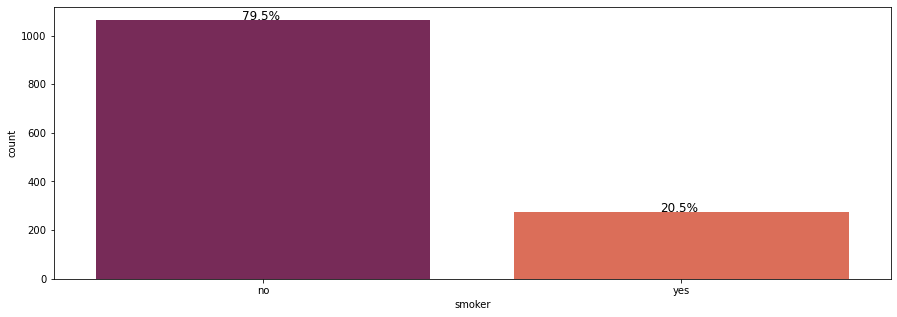

In [21]:
#EDA on categorical variables
plt.figure(figsize=(15,5))
ax = sns.countplot(df["smoker"],palette='rocket')
bar_perc(ax,df["smoker"])

* There are more non-smokers (79.5%) than smokers(20.5%).

## Observations on Regions

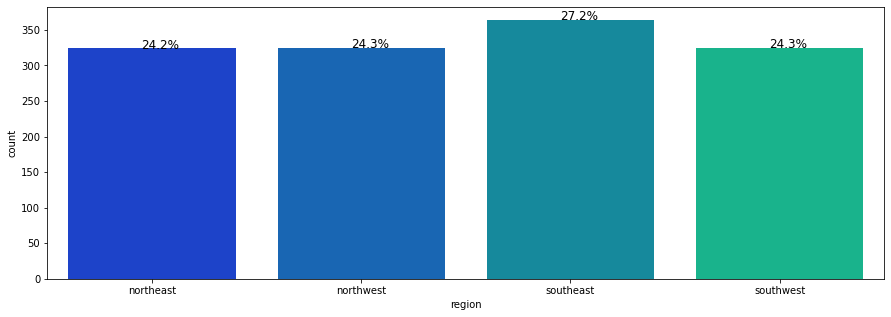

In [22]:
#EDA on categorical variables
plt.figure(figsize=(15,5))
ax = sns.countplot(df["region"],palette='winter')
bar_perc(ax,df["region"])

* There are slightly more customers from the southeast (27.2%) than the other regions.
* The northeast (24.2%), northwest(24.3%), and southwest(24.3%) are nearly equal.

## Bivariate Analysis

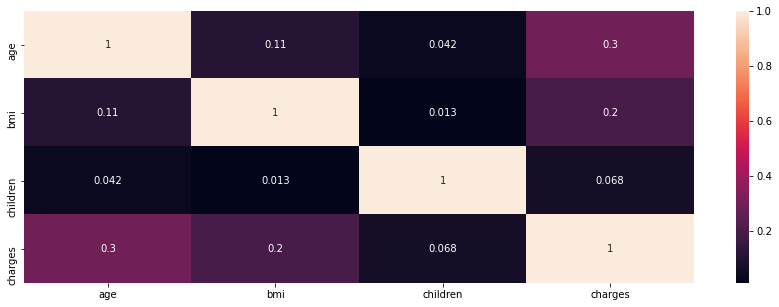

In [23]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True) # heatmap of the correlations of variable in our dataset
plt.show()

* Age is highly correlated with charges, younger customers are typically in better health and so have fewer medical costs billed to insurance.
* BMI and charges are highly correlated, overweight individuals likely experience more health problems and charge more medical costs to insurance.
* Children has a lower correlation with age, older customers likely have adult children who have their own insurance.
* Children has a low correlation with charges, which is unexpected. Perhaps customers without children have more medical conditions that lead to more charges and also prevent them from having children.
* BMI and children has the lowest correlation. This should be investigated further.

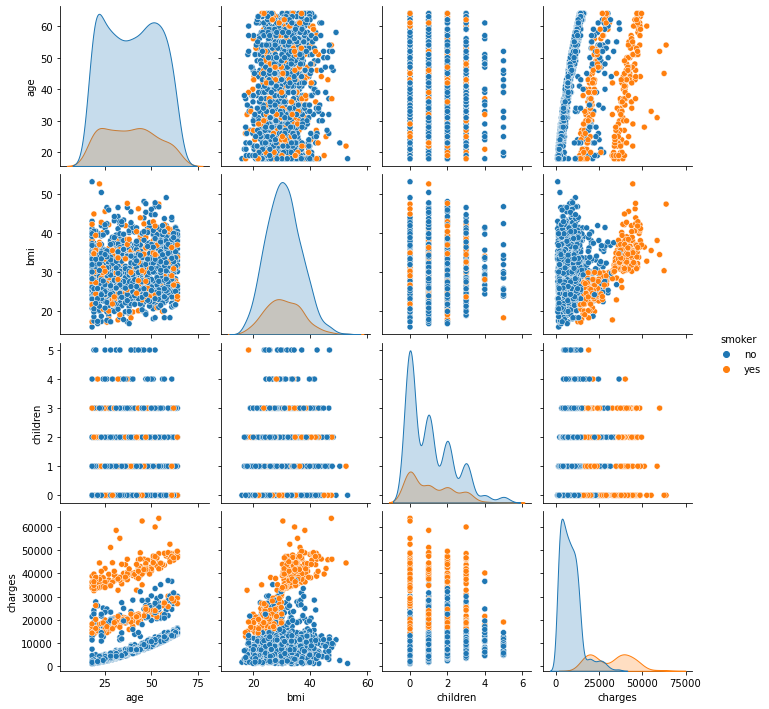

In [24]:
#pairplot generates a bivariate analysis, change the hue to provides multivariate analysis
sns.pairplot(data=df, hue='smoker') 
plt.show()

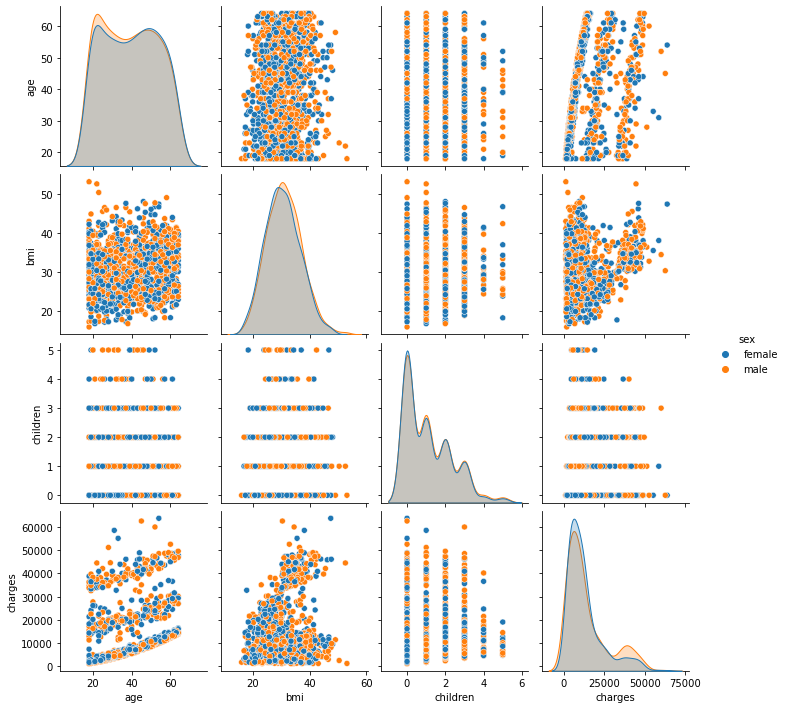

In [25]:
sns.pairplot(data=df, hue='sex') 
plt.show()

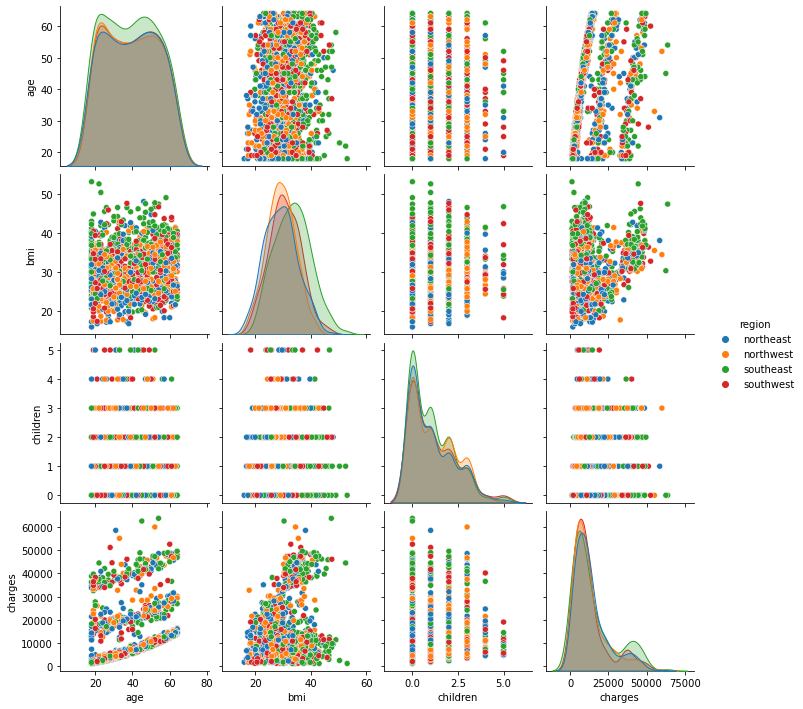

In [26]:
sns.pairplot(data=df, hue='region') 
plt.show()

* We can see varying distributions invariables for different products.
* Smoking  highlights the greatest difference in distributions across variable, typically highly correlated to the unhealthier metrics (BMI, Charges). 

## Regions vs. Charges

Text(0.5, 0, 'region')

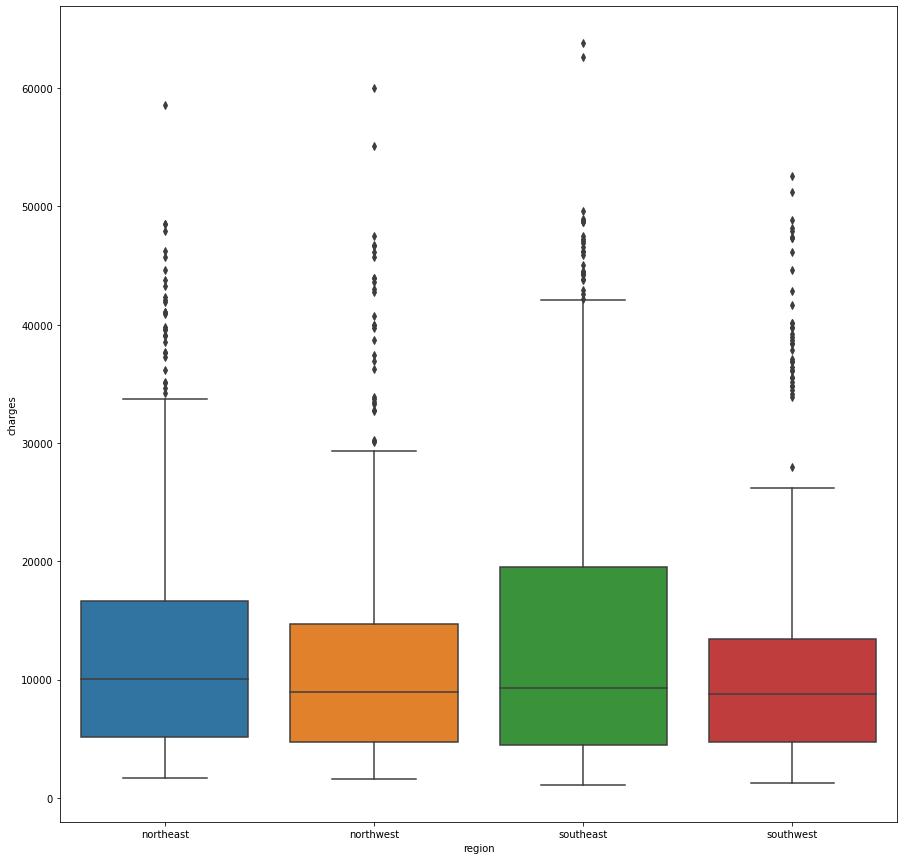

In [27]:
plt.figure(figsize=(15,15))           
sns.boxplot(df['region'],df['charges']) #boxplot
plt.ylabel('charges')
plt.xlabel('region')

* Similar median charge values (~10000) exist across all regions.
* All regions have high charge outliers.
* The southeast region has the largest range of charges.

## Regions vs BMI

Text(0.5, 0, 'region')

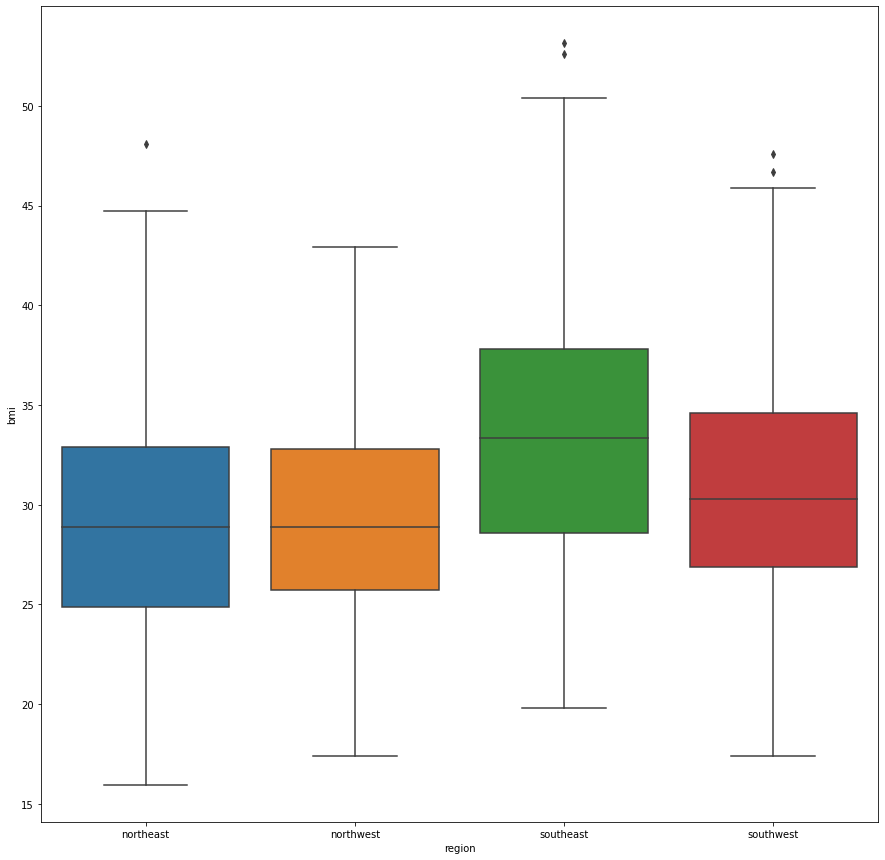

In [28]:
plt.figure(figsize=(15,15))           
sns.boxplot(df['region'],df['bmi'])
plt.ylabel('bmi')
plt.xlabel('region')

* BMI range in the southeast is greater than other regions.
* Could this indicate other unhealthy habits?

## Regions vs Age

Text(0.5, 0, 'region')

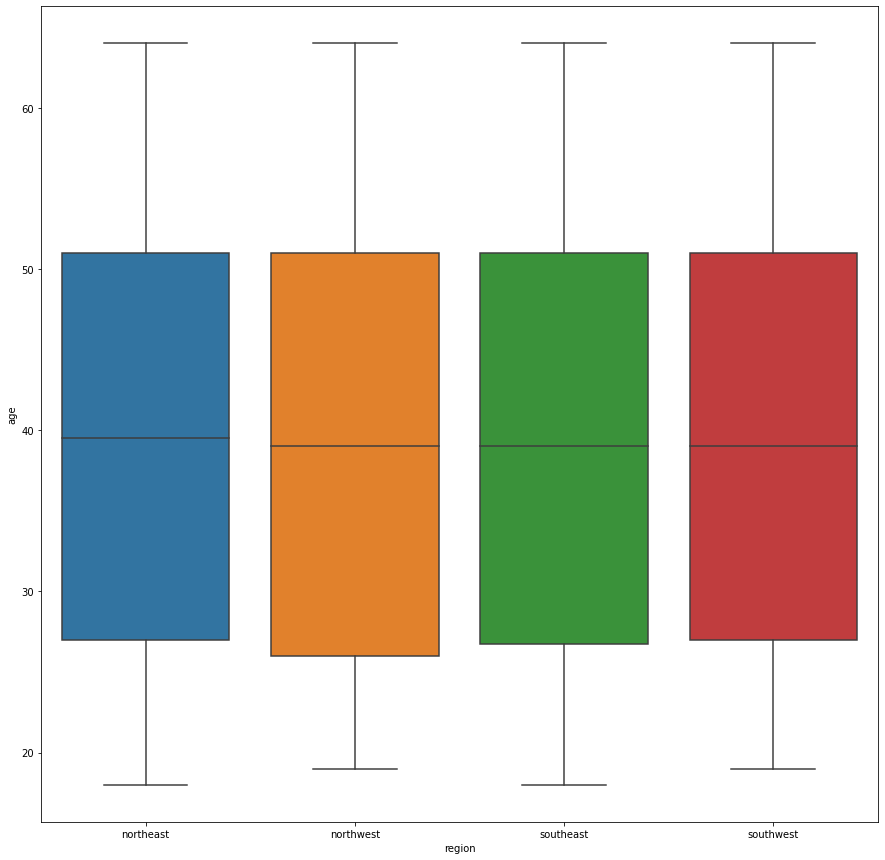

In [29]:
plt.figure(figsize=(15,15))           
sns.boxplot(df['region'],df['age'])
plt.ylabel('age')
plt.xlabel('region')

* Age doesn't really vary by region

## Regions vs Children

Text(0.5, 0, 'region')

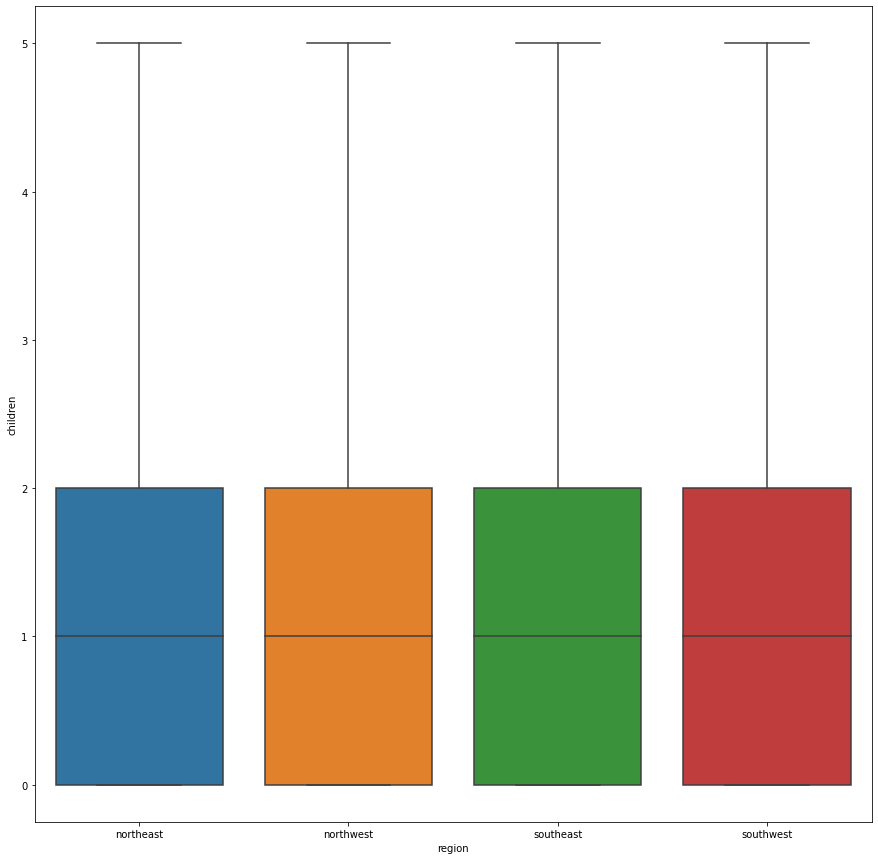

In [30]:
plt.figure(figsize=(15,15))           
sns.boxplot(df['region'],df['children'])
plt.ylabel('children')
plt.xlabel('region')

* Age of customers, and number of children covered by the plan do not vary by region.

## Smoker counts and percentages by region

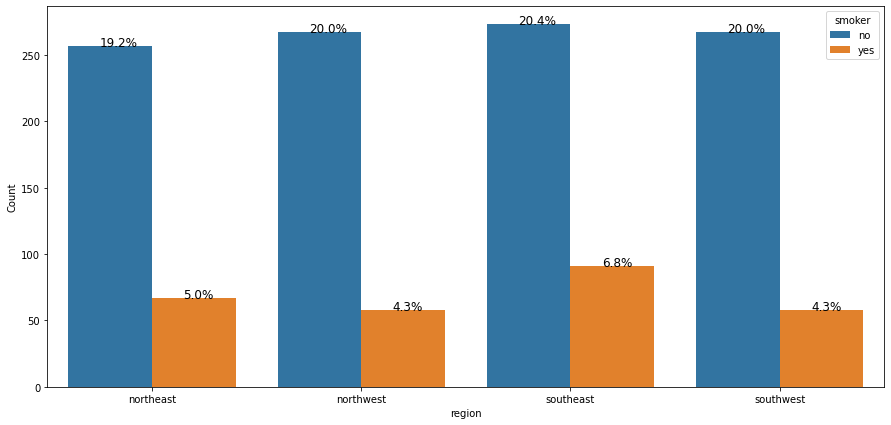

In [31]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df['region'], hue= df['smoker'])
plt.xlabel('region')
plt.ylabel('Count')
bar_perc(ax,df['smoker'])

* The proportions of smokers are similar by region, but southeast (6.8%) has a higher proportion of smokers.

## Smokers vs Age

Text(0.5, 0, 'smoker')

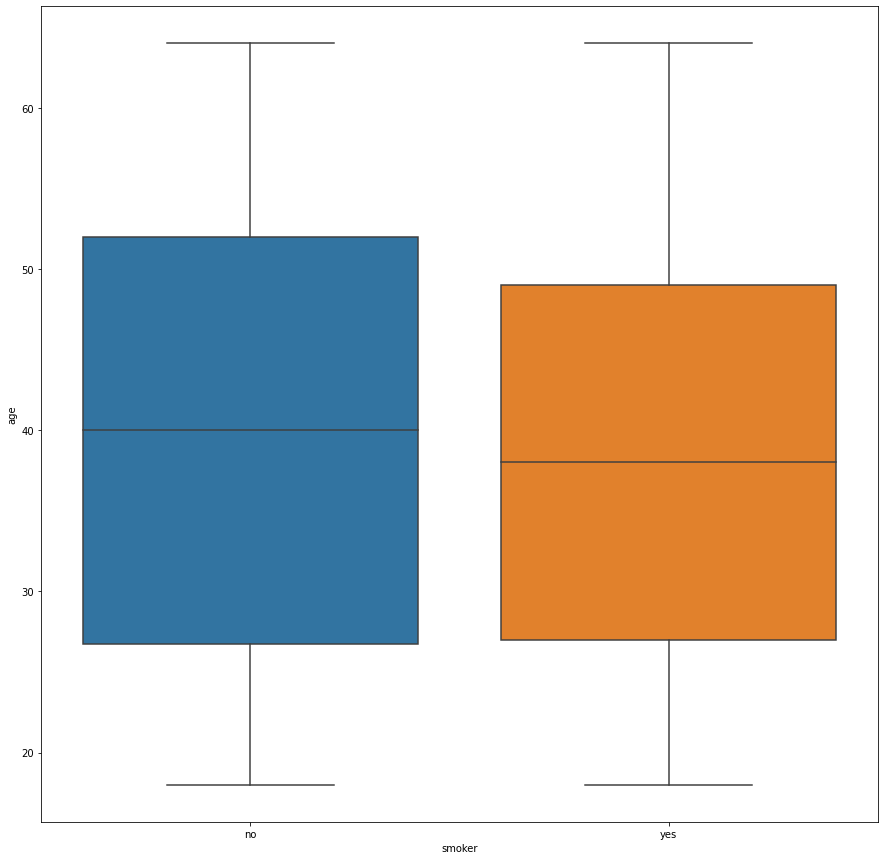

In [32]:
plt.figure(figsize=(15,15))           
sns.boxplot(df['smoker'],df['age'])
plt.ylabel('age')
plt.xlabel('smoker')

* Non-smokers in the group have a slightly higher median age (40) compared to smokers (38).

## Smokers vs BMI

Text(0.5, 0, 'smoker')

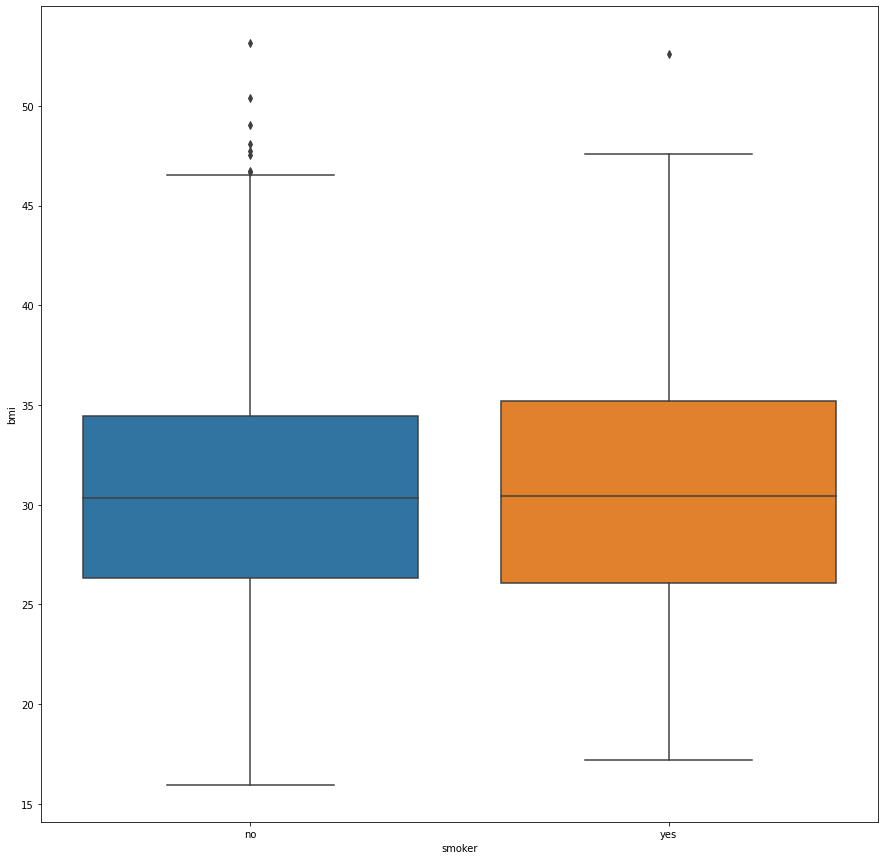

In [33]:
plt.figure(figsize=(15,15))           
sns.boxplot(df['smoker'],df['bmi'])
plt.ylabel('bmi')
plt.xlabel('smoker')

* Similar BMI between smokers and non-smokers.
* There are more outliers in BMI for non-smokers.

## Smoker vs Charges

Text(0.5, 0, 'smoker')

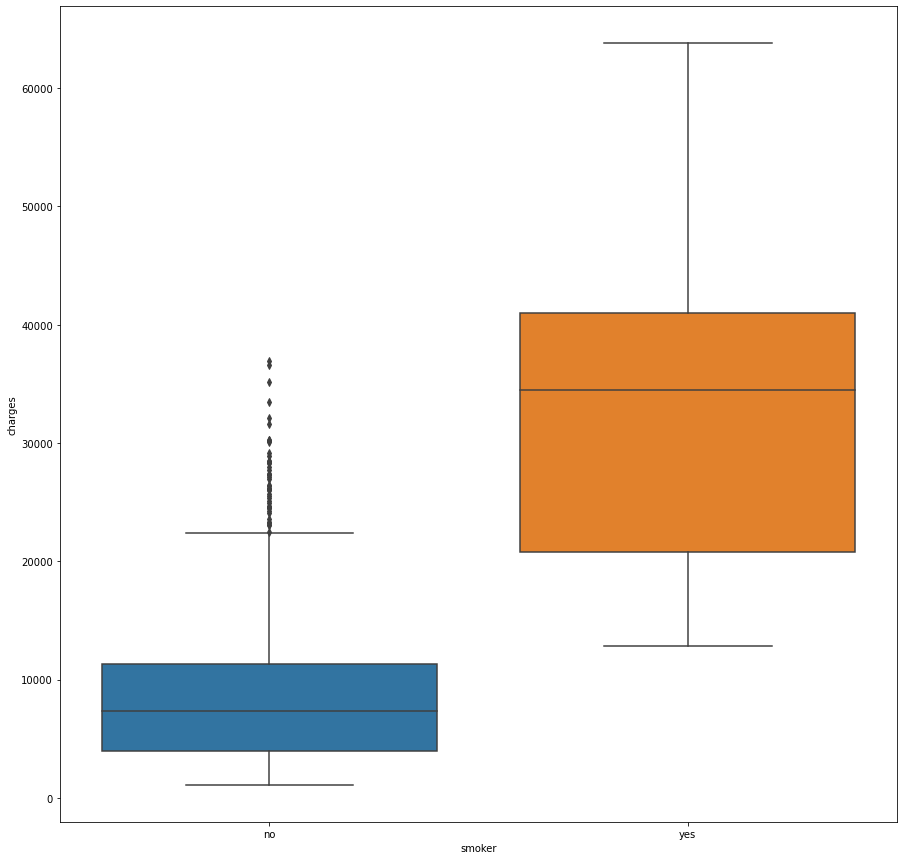

In [34]:
plt.figure(figsize=(15,15))           
sns.boxplot(df['smoker'],df['charges'])
plt.ylabel('charges')
plt.xlabel('smoker')

* More medical costs billed to health insurance by smokers than non-smokers.
* The minimum range for smokers is higher than the third quartile(Q3) of non-smokers, meaning over 75% of non-smokers have lower medical costs than smokers.

## Sex vs Charges

Text(0.5, 0, 'sex')

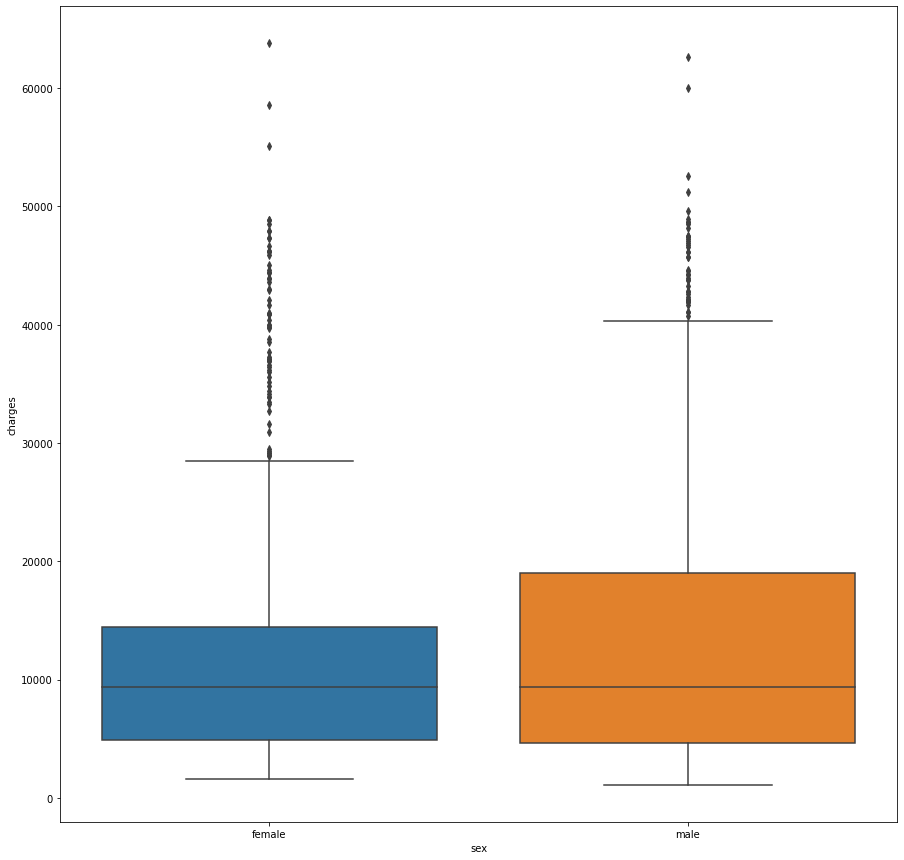

In [35]:
plt.figure(figsize=(15,15))           
sns.boxplot(df['sex'],df['charges'])
plt.ylabel('charges')
plt.xlabel('sex')

* Males have a larger IQR of charges than females.
* Both sexes have outliers for charges.
* Men have a larger high side charge value than women.

## Sex vs BMI

Text(0.5, 0, 'sex')

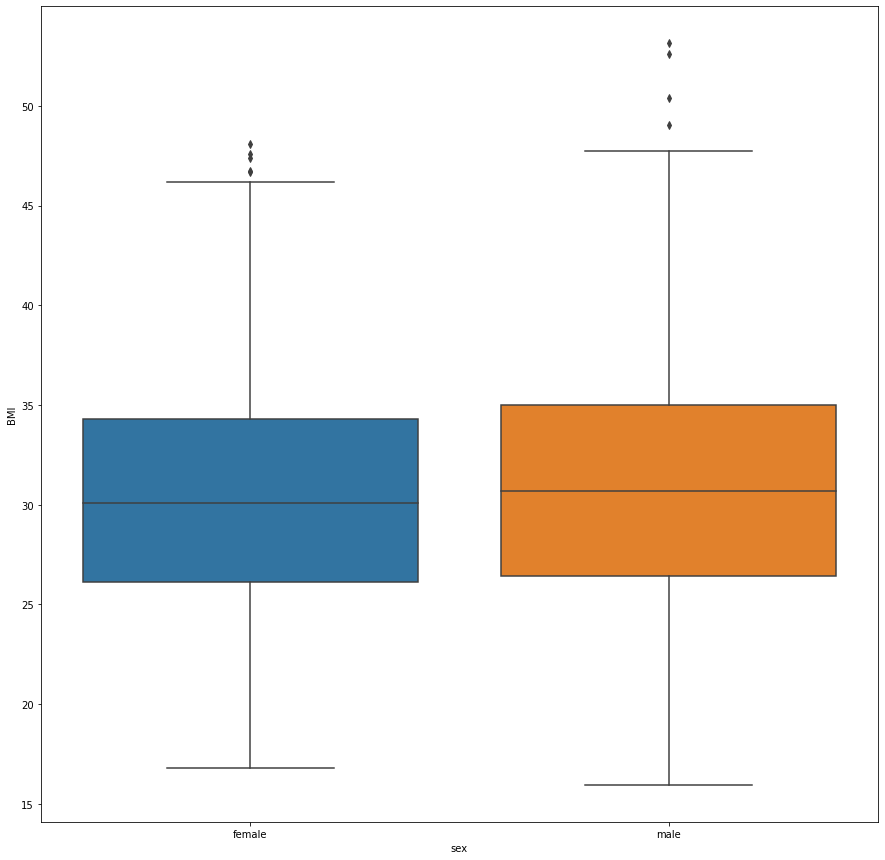

In [36]:
plt.figure(figsize=(15,15))           
sns.boxplot(df['sex'],df['bmi'])
plt.ylabel('BMI')
plt.xlabel('sex')

* Not much of a difference in BMI between sexes.

Text(0.5, 0, 'children')

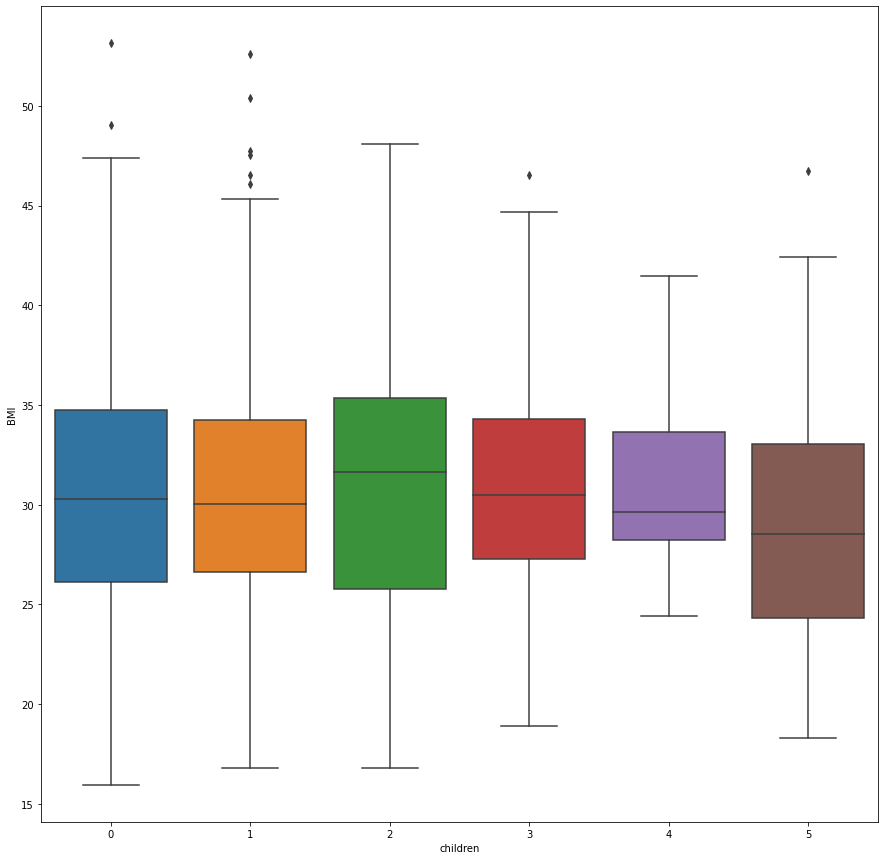

In [64]:
plt.figure(figsize=(15,15))           
sns.boxplot(df['children'],df['bmi'])
plt.ylabel('BMI')
plt.xlabel('children')

* Interesting distribution of customer BMI by number of children.
* Median values are all around 30 indicating the upper end to slightly overweight nature of customers.
* Ranges are variable with outliers.
* Customers with 4 children have the smallest BMI range, while customers with 2 children have the largest. Would this hold true looking at specific genders?

# Question 1:
## Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

### Let's write the null and alternative hypothesis


Let $\mu_1, \mu_2$ be the mean charges of **smoker** and **non-smoker** groups respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

## Filter datasets on smokers

In [37]:
df[df['smoker']=="yes"].describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,274.000000,274,274.000000,274.000000,274,274,274.000000
unique,NaN,2,NaN,NaN,1,4,NaN
top,NaN,male,NaN,NaN,yes,southeast,NaN
freq,NaN,159,NaN,NaN,274,91,NaN
mean,38.514599,NaN,30.708449,1.113139,NaN,NaN,32050.231832
std,13.923186,NaN,6.318644,1.157066,NaN,NaN,11541.547176
min,18.000000,NaN,17.195000,0.000000,NaN,NaN,12829.455100
25%,27.000000,NaN,26.083750,0.000000,NaN,NaN,20826.244213
50%,38.000000,NaN,30.447500,1.000000,NaN,NaN,34456.348450
75%,49.000000,NaN,35.200000,2.000000,NaN,NaN,41019.207275


In [38]:
df[df['smoker']=="no"].describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1064.000000,1064,1064.000000,1064.000000,1064,1064,1064.000000
unique,NaN,2,NaN,NaN,1,4,NaN
top,NaN,female,NaN,NaN,no,southeast,NaN
freq,NaN,547,NaN,NaN,1064,273,NaN
mean,39.385338,NaN,30.651795,1.090226,NaN,NaN,8434.268298
std,14.083410,NaN,6.043111,1.218136,NaN,NaN,5993.781819
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.750000,NaN,26.315000,0.000000,NaN,NaN,3986.438700
50%,40.000000,NaN,30.352500,1.000000,NaN,NaN,7345.405300
75%,52.000000,NaN,34.430000,2.000000,NaN,NaN,11362.887050


* Comparing the filtered datasets of smokers vs the non-smokers, we can see the mean and median charges are higher for smokers than non-smokers.

## Smoker vs Charges

Text(0.5, 0, 'smoker')

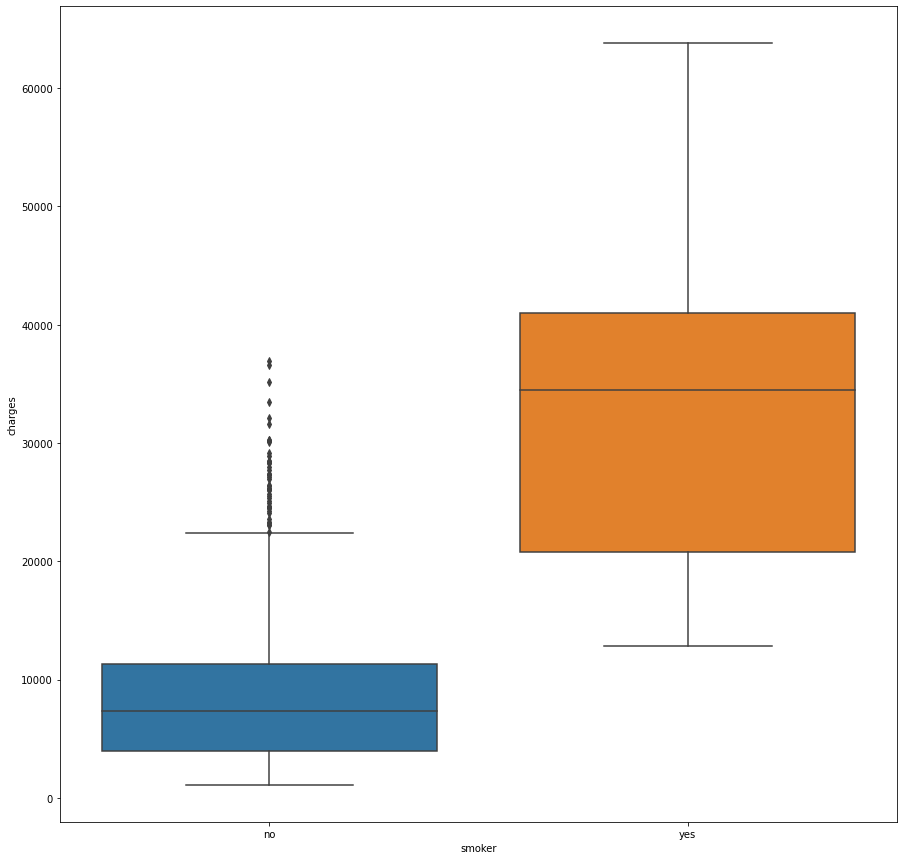

In [39]:
plt.figure(figsize=(15,15))           
sns.boxplot(df['smoker'],df['charges'])
plt.ylabel('charges')
plt.xlabel('smoker')

* More medical costs billed to health insurance by smokers than non-smokers.
* The minimum range for smokers is higher than the third quartile(Q3) of non-smokers, meaning over 75% of non-smokers have lower medical costs than smokers.
* The graphs and datasets support the claim, but we need to test the hypothesis.

## Identify the right test

In [40]:
# find the sample means and sample standard deviations for the two samples
print('The mean charges for the smoker group is ' + str(df['charges'][df['smoker']=="yes"].mean()))
print('The mean charges for the non-smoker group is ' + str(df['charges'][df['smoker']=="no"].mean()))
print('The standard deviation of charges for the smoker group is ' + str(round(df['charges'][df['smoker']=="yes"].std(), 2)))
print('The standard deviation of charges for the non-smoker group is ' + str(round(df['charges'][df['smoker']=="no"].std(), 2)))

The mean charges for the smoker group is 32050.23183153285
The mean charges for the non-smoker group is 8434.268297856199
The standard deviation of charges for the smoker group is 11541.55
The standard deviation of charges for the non-smoker group is 5993.78


* We are looking to compare continuous univariate variable (charges). Based on EDA, we have 2 independent samples from the dataset population, with unequal means and unknown variation.
* We are looking to see if one value is greater, so we are running a one-tail test.
### I have chosen a (one tail) two independent sample t-test (unequal std)

## Check Assumptions
* Continuous data
* Normally distributed populations
* Independent populations
* Unequal population std
* Random sampling from the population

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ bmi follows a normal distribution against

against the alternative hypothesis

>$H_a:$ bmi does not follow a normal distribution

In [41]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df['charges']) 
print('The p-value is', p_value)

The p-value is 1.150477698013898e-36


P-value is less than the level of significance, so we have statistical evidence to reject the null hypothesis.
While we reject the null hypothesis, we were told to assume normal distribution for this test.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [42]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df['charges'][df['smoker']=="yes"], 
                                   df['charges'][df['smoker']=="no"] )
# find the p-value
print('The p-value is', p_value)

The p-value is 1.5593284881803726e-66


P-value is less than the level of significance, so we have statistical evidence to reject the null hypothesis.

### T-test assumptions are satisfied

* Continuous data - Yes, charges are individual medical costs billed to insurance. Charges are measured on a continuous scale.
* Normally distributed populations - DespiteRejecting the Shapiro-Wilks null hypothesis we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups (Smokers vs Non-smokers), the two samples are from two independent populations.
* Unequal population standard deviations - Levene's test indicates appropriate to reject the null hypothesis of equal variance.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

## Perform T-Test

In [43]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df['charges'][df['smoker']=="yes"], df['charges'][df['smoker']=="no"].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  2.94473222335849e-103


### Conclusion
* As the p-value (p<0.001) is far less than the level of significance, we can reject the null hypothesis. We have enough evidence to support the claim that smokers medical claims are greater than those who don't.
* With the null hypothesis rejected, we can consider changes or modifications to the coverage structure or insurance costs for smokers.

# Question 2:
## Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2$ be the mean BMI of **Female** and **Male** groups respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1 \neq \mu_2$

## Filter datasets on sex

In [44]:
df[df['sex']=="female"].describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,662.000000,662,662.000000,662.000000,662,662,662.000000
unique,NaN,1,NaN,NaN,2,4,NaN
top,NaN,female,NaN,NaN,no,southeast,NaN
freq,NaN,662,NaN,NaN,547,175,NaN
mean,39.503021,NaN,30.377749,1.074018,NaN,NaN,12569.578844
std,14.054223,NaN,6.046023,1.192115,NaN,NaN,11128.703801
min,18.000000,NaN,16.815000,0.000000,NaN,NaN,1607.510100
25%,27.000000,NaN,26.125000,0.000000,NaN,NaN,4885.158700
50%,40.000000,NaN,30.107500,1.000000,NaN,NaN,9412.962500
75%,51.750000,NaN,34.313750,2.000000,NaN,NaN,14454.691825


In [45]:
df[df['sex']=="male"].describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,676.000000,676,676.000000,676.000000,676,676,676.000000
unique,NaN,1,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,517,189,NaN
mean,38.917160,NaN,30.943129,1.115385,NaN,NaN,13956.751178
std,14.050141,NaN,6.140435,1.218986,NaN,NaN,12971.025915
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.410000,0.000000,NaN,NaN,4619.134000
50%,39.000000,NaN,30.687500,1.000000,NaN,NaN,9369.615750
75%,51.000000,NaN,34.992500,2.000000,NaN,NaN,18989.590250


* Comparing the filtered datasets of females vs males, we can see the mean BMI values are equal but median BMI are higher for males than females.

## Sex vs BMI

Text(0.5, 0, 'sex')

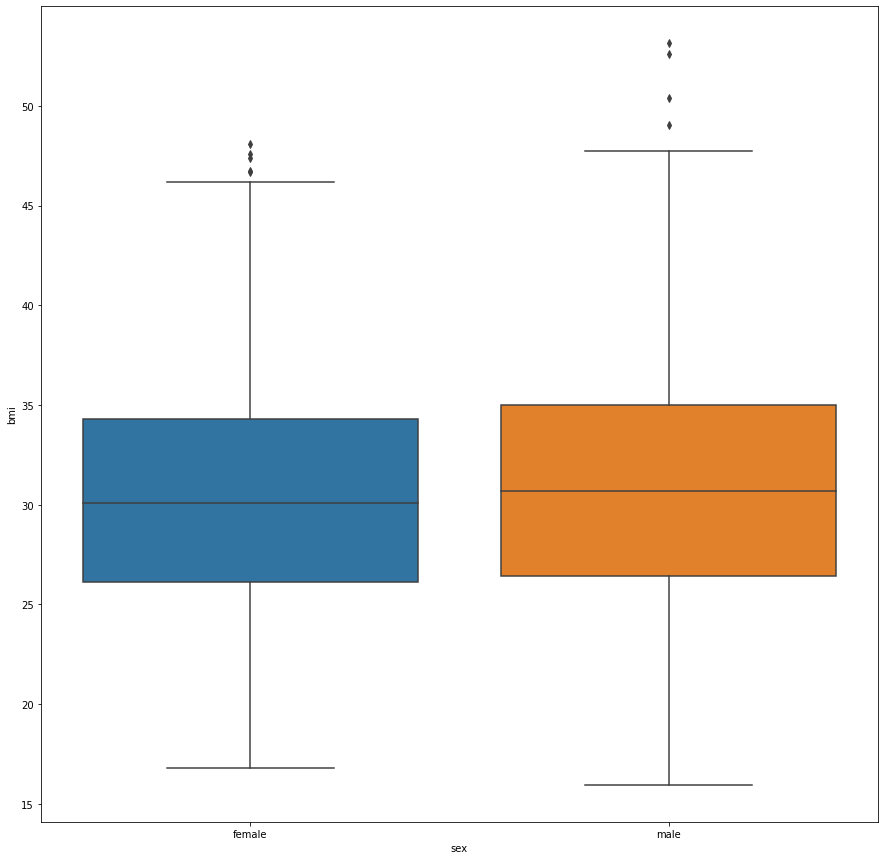

In [46]:
plt.figure(figsize=(15,15))           
sns.boxplot(df['sex'],df['bmi'])
plt.ylabel('bmi')
plt.xlabel('sex')

* The median BMI for males is slightly higher than for females.

In [47]:
# find the sample means and sample standard deviations for the two samples
print('The mean charges for the Female group is ' + str(df['bmi'][df['sex']=="female"].mean()))
print('The mean charges for the Male group is ' + str(df['bmi'][df['sex']=="male"].mean()))
print('The standard deviation of bmi for the Female group is ' + str(round(df['bmi'][df['sex']=="female"].std(), 2)))
print('The standard deviation of bmi for the Male group is ' + str(round(df['bmi'][df['sex']=="male"].std(), 2)))

The mean charges for the Female group is 30.377749244713023
The mean charges for the Male group is 30.943128698224832
The standard deviation of bmi for the Female group is 6.05
The standard deviation of bmi for the Male group is 6.14


* We are looking to compare continuous univariate variable (charges). Based on EDA, we have 2 independent samples from the dataset population, with equal means and unknown variation.
* We are looking to see if the mean values are equal, or not, so we must perform a two-tail test
### I have chosen a (two-tail) two independent sample t-test (equal std)

## Check Assumptions
* Continuous data
* Normally distributed populations
* Independent populations
* Equal population std
* Random sampling from the population

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ bmi follows a normal distribution against

against the alternative hypothesis

>$H_a:$ bmi does not follow a normal distribution

In [48]:
# Assumption 1: Normality
# find the p-value
w, p_value = stats.shapiro(df['bmi']) 
print('The p-value is', p_value)

The p-value is 2.609841976664029e-05


P-value is less than the level of significance, so we reject the null hypothesis.
While we reject the null hypothesis, we were told to assume normal distribution for this test.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [49]:
#Assumption 2: Homogeneity of Variance
statistic, p_value = levene( df['bmi'][df['sex']=="male"], 
                                   df['bmi'][df['sex']=="female"] )
# find the p-value
print('The p-value is', p_value)

The p-value is 0.949963293424026


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### T-test assumptions are satisfied

* Continuous data - Yes, charges are individual medical costs billed to insurance. Charges are measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, Males and Females.
* Unequal population standard deviations -Levene's test indicates we have evidence to reject the null hypothesis of equal variance.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

## Perform T-Test

In [50]:
# find the p-value
test_stat, p_value = ttest_ind(df['bmi'][df['sex']=="female"], df['bmi'][df['sex']=="male"].dropna(), equal_var = True, alternative = 'two-sided')
print('The p-value is ', p_value)

The p-value is  0.08997637178984934


### Conclusion
As the p-value is greater than the level of significance, we fail to reject the null hypothesis. The mean BMI of Males and Females is statistically equal.

# Question 3:
## Is the proportion of smokers significantly different across different regions?
Do we have enough statistical evidence to conclude that smoking preference depends on region?

### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ smoking preference is independent of region.

against the alternate hypothesis

>$H_a:$ smoking preference and region are not independent.

## Filter datasets on smoker status

In [51]:
smoke=df[df['smoker']=="yes"].describe(include="all")

In [52]:
n_smoke= df[df['smoker']=="no"].describe(include="all")

## Smoker counts and percentages by region

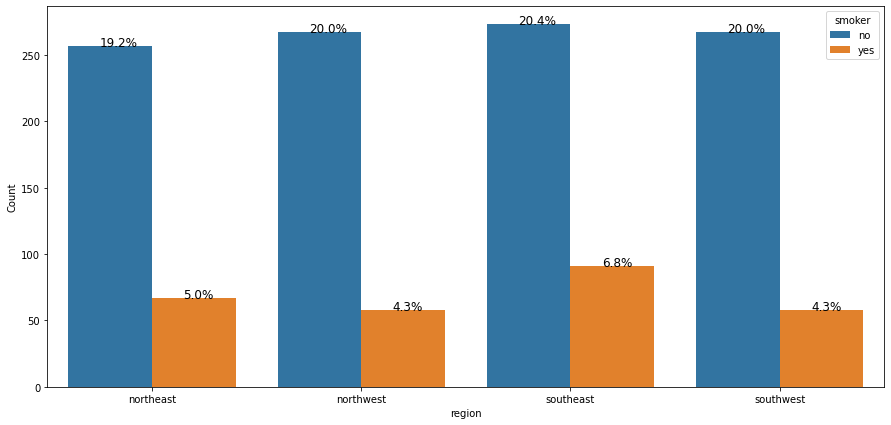

In [53]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df['region'], hue= df['smoker'])
plt.xlabel('region')
plt.ylabel('Count')
bar_perc(ax,df['smoker'])


* The proportions of smokers are similar by region, but southeast (6.8%) has a higher proportion of smokers.

* We are comparing two variable (region, and smoker) and are interested in whether the two variables are independent
### I have chosen a chi square test for independence

## Assumptions Chi Square Test

* Categorical variables
* Expected value of the number of sample observations in each level of the variable is at least 5
* Random sampling from the population

## Contingency Table
### Create a contingency table directly comparing  the two variables and stores the number of observations for each

In [54]:
regf = pd.crosstab(index=df['region'], columns=df['smoker'])
regf.head()

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


### Chi Square assumptions are satisfied
* Comparing categorical variables (region, smoker)
* More than 5 sample observations at each of the variables
* random sampling from the population

## Perform Chi Square Test

In [55]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(regf)
print('The p-value is', p_value)

The p-value is 0.06171954839170541


### Conclusion
The p-value is greater than the 5% significance level, so we fail to reject the null hypothesis. Smoking preference is independent of region

# Question 4:
## Is the mean BMI of women with no children, one child, or two children the same? 

### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ mean BMI of women with different amounts of children are all equal

against the alternate hypothesis

>$H_a:$ mean BMI of at least one population of women with different amounts of children are not the same

## Filter dataset on sex and number of children

In [56]:
fem = df[(df['sex']=="female") & (df['children']<=2) ] #create a dataset from df with only women and 2 children or fewer
fem.drop('sex',axis=1,inplace=True)
fem.head()

,age,bmi,children,smoker,region,charges
0,19,27.90,0,yes,southwest,16884.92400
5,31,25.74,0,no,southeast,3756.62160
6,46,33.44,1,no,southeast,8240.58960
9,60,25.84,0,no,northwest,28923.13692
11,62,26.29,0,yes,southeast,27808.72510


In [57]:
fem.describe()

,age,bmi,children,charges
count,566.000000,566.000000,566.000000,566.000000
mean,39.125442,30.335910,0.699647,12405.058539
std,14.310470,6.055825,0.794828,11358.829450
min,18.000000,16.815000,0.000000,1607.510100
25%,26.000000,26.053750,0.000000,4371.572437
50%,39.500000,29.972500,0.000000,9041.613500
75%,51.000000,34.437500,1.000000,14399.313138
max,64.000000,48.070000,2.000000,63770.428010


## BMI of Women with 0, 1, and 2 children

Text(0.5, 0, 'children')

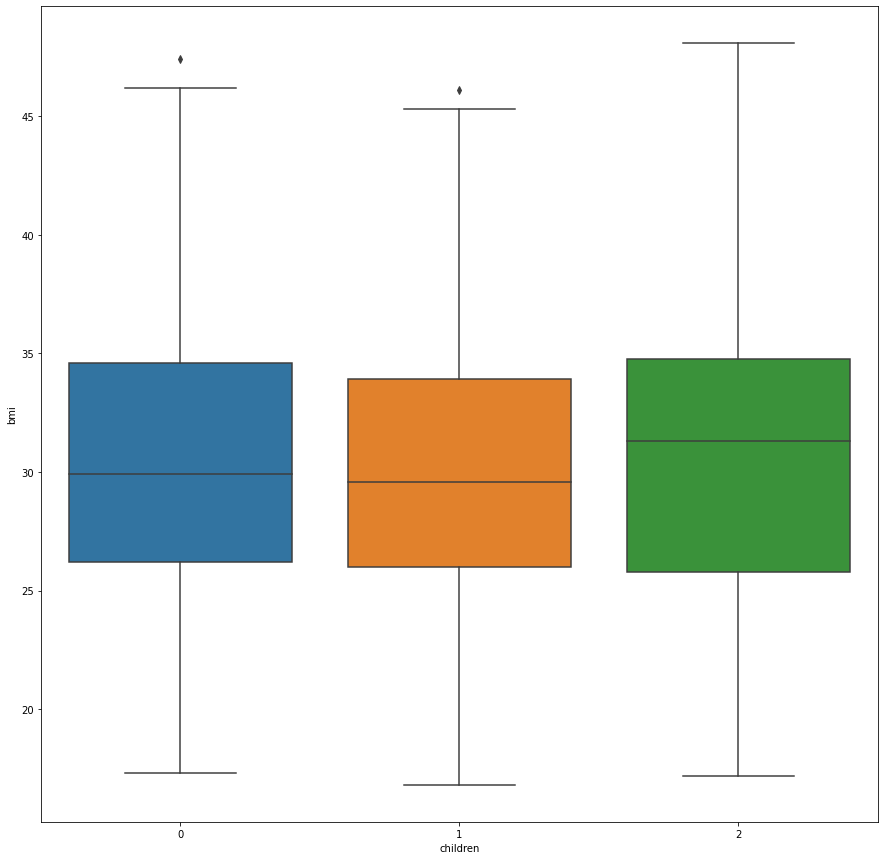

In [58]:
plt.figure(figsize=(15,15))           
sns.boxplot(fem['children'],fem['bmi'])
plt.ylabel('bmi')
plt.xlabel('children')

* Ranges of BMI between women with 0, 1, or 2 children are similar, with a few outliers.
* Median BMI values of women with 0 and 1 children is slightly less than women with 2 children.

## Check assumptions One-way ANOVA

* The populations are normally distributed
* Samples are independent simple random samples
* Population variances are equal

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ bmi follows a normal distribution

against the alternative hypothesis

>$H_a:$ bmi does not follow a normal distribution

In [59]:
# Assumption 1: Normality
# find the p-value
w, p_value = stats.shapiro(fem['bmi']) 
print('The p-value is', p_value)

The p-value is 0.010864038951694965


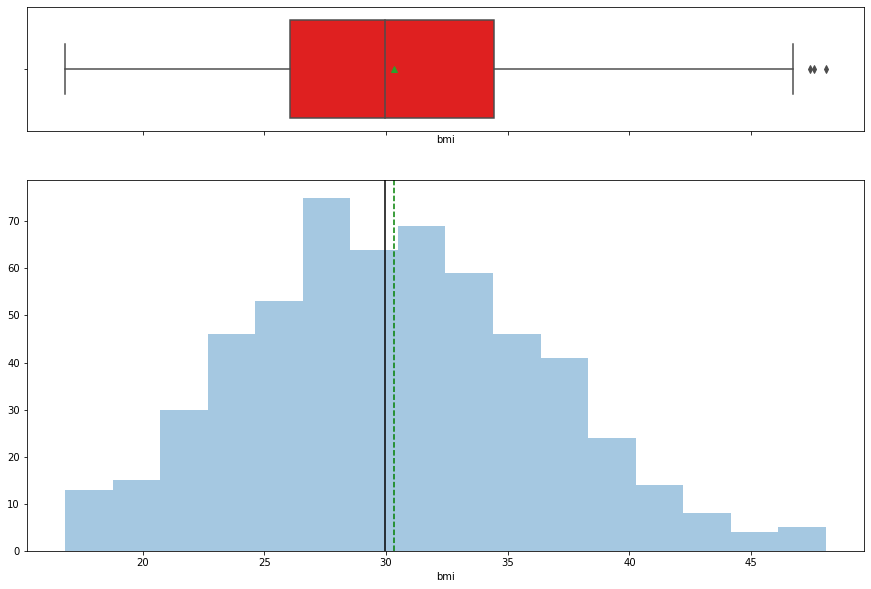

In [60]:
histobox(fem['bmi']) #check the distribution of just female bmi

With a p-value smaller than the level of significance, we have statistical evidence to reject the null hypothesis. The data looks almost normal, but the tails and mean and median are slightly off.
While the sample data doesn't have a normal distribution, the one-way ANOVA tolerates violations of the normality assumption. The one-way ANOVA can tolerate data that is non-normal with only a small effect on the Type I error rate. For the purpoose of this exercise we assume a normal distribution of the female populations BMI.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [61]:
#Assumption 2: Homogeneity of Variance
statistic, p_value = levene( fem['bmi'][fem['children']==0], 
                                   fem['bmi'][fem['children']==1],
                                   fem['bmi'][fem['children']==2],)
# find the p-value
print('The p-value is', p_value)

The p-value is 0.3899432394522804


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

## Assumptions of One-way ANOVA are satisfied

* The populationisn't normally distributed, but ANOVA is a robust test able to handle that
* Samples are independent simple random samples
* Population variances are equal

## Perform ANOVA test

In [62]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(fem.loc[fem['children'] == 0, 'bmi'],
                              fem.loc[fem['children'] == 1, 'bmi'],
                              fem.loc[fem['children'] == 2, 'bmi'])
print('The p-value is ' + str(p_value))

The p-value is 0.7158579926754841


### Conclusion
As the p-value is greater than the significance level, we fail to reject the null hypothesis. We do not have enough statistical significance to conclude that female mean BMI differs between women with 0, 1, or 2 children at a 5% significance level.


## Overall Conclusions
This dataset of 1338 insurance customers is randomly sampled and representative of the larger population.
Performing univariate and bivariate analysis provided a tremendous amount of observations about individual variables and the relationship between variables of the sample population.
While these observations are very helpful and important, they are best used to highlight relationships that merit a deeper investigation. Because Axis insurance has a large population group, taking this random sample allows for a more thorough look at some key questions and seeing if there is enough statistical significance to reject hypotheses. While standard EDA might provide information about the numerical value of a variable, it fails to capture the plausibility of a hypothesis about the population just using the sample. By performing hypothesis testing, we are able to statisticaly test and see whether a value is reasonable based on the evidence from the sample group.

Going forward, there still remains much to be gained from this dataset. I recommend Axis insurance continue with more multivariate analysis of the greater population to see if there are any other interesting insights and hypotheses to test. I would also recommend taking some other, different sample groups to run the hypothesis tests again. They might be able to acheive a better normal distribution with different groups (especially a more normal age distribution, which likely skewed some of the other distributions.

Below we have an example of multivariate analysis highlighting the relationship between charges and BMI. We can consider changes or modifications to the coverage structure or insurance costs for smokers, while also using our analysis for future predictive analytics for new customers.

Text(0.5, 1.0, 'Charges and BMI by Smoking')

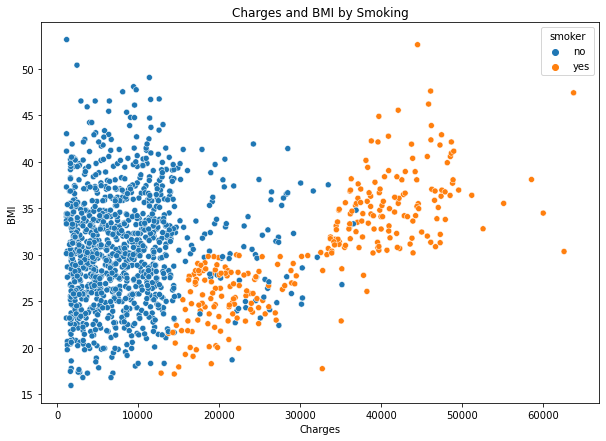

In [65]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = df, x = 'charges', y = 'bmi', hue = 'smoker')
plt.xlabel('Charges')
plt.ylabel('BMI')
plt.title('Charges and BMI by Smoking')

* Portions of code used in this project were modified from code used in my project 1, as well as some of the code shown over the course of the business statistics module